# Ref

conv operator :
- https://gfycat.com/ko/plasticmenacingdegu
- https://eda-ai-lab.tistory.com/2
- https://talkingaboutme.tistory.com/entry/DL-Convolution%EC%9D%98-%EC%A0%95%EC%9D%98
- https://blog.naver.com/PostView.nhn?blogId=laonple&logNo=220623406512
- https://blog.naver.com/PostView.nhn?blogId=laonple&logNo=220587920012&parentCategoryNo=&categoryNo=22&viewDate=&isShowPopularPosts=false&from=postView

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# image show

(220, 220, 3)


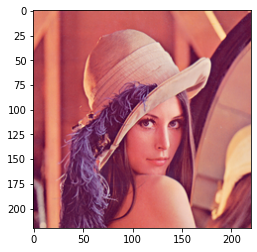

In [2]:
img = cv2.imread("Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.show()

# convolution

In [3]:
def conv2d(ndarray, conv_filter):
    H, W = ndarray.shape[0], ndarray.shape[1]
    fH, fW = conv_filter.shape[0], conv_filter.shape[1]
    
    output = np.zeros(ndarray.shape)
    
    for i in range(H-fH+1):
        for j in range(W-fW+1):
            tmp_conv = ndarray[i:i+fH, j:j+fW] * conv_filter
            output[i,j] = np.sum(np.sum(tmp_conv, axis=0), axis=0)
    return output

# sample filter (edge)

In [4]:
conv_filter1 = np.array([[-1, -1, -1],
                         [0 ,0 ,0],
                         [1, 1, 1]]).reshape(3,3,1)
conv_filter2 = np.array([[1, 0, -1],
                         [1 ,0 ,-1],
                         [1, 0, -1]]).reshape(3,3,1)

In [5]:
result = conv2d(img, conv_filter2)
# result = (result - np.min(result)) / (np.max(result) - np.min(result))
result

array([[[ -5.,  10.,  21.],
        [ -9.,  -3.,   8.],
        [  3.,  -2.,  -5.],
        ...,
        [ 85.,  93.,  75.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ -5.,   7.,   9.],
        [ -9.,  -2.,   6.],
        [  3.,  -3.,  -4.],
        ...,
        [115.,  98.,  56.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ -7.,   9.,   0.],
        [ -7.,   4.,   3.],
        [  4.,  -8.,  -4.],
        ...,
        [108.,  76.,  29.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[-24.,  -3.,  -4.],
        [-10., -10., -10.],
        [  0.,  -7., -19.],
        ...,
        [-81., -28.,  -1.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


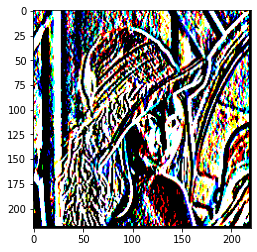

In [6]:
plt.imshow(result, 'gray')
plt.show()

--------------------------------

# another version

(220, 220, 3)


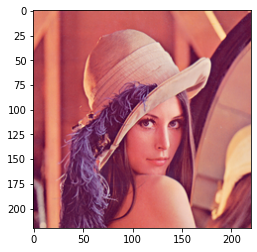

In [7]:
img = cv2.imread("Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.show()

In [8]:
class conv_filter1:
    R = np.array([[-1, -1, -1],
                  [0 ,0 ,0],
                  [1, 1, 1]])
    G = np.array([[-1, -1, -1],
                  [0 ,0 ,0],
                  [1, 1, 1]])
    B = np.array([[-1, -1, -1],
                  [0 ,0 ,0],
                  [1, 1, 1]])
    
class conv_filter2:
    R = np.array([[1, 0, -1],
                  [1 ,0 ,-1],
                  [1, 0, -1]])
    G = np.array([[1, 0, -1],
                  [1 ,0 ,-1],
                  [1, 0, -1]])
    B = np.array([[1, 0, -1],
                  [1 ,0 ,-1],
                  [1, 0, -1]])
    
filter1 = np.array([conv_filter1.R, conv_filter1.G, conv_filter1.B])
filter2 = np.array([conv_filter2.R, conv_filter2.G, conv_filter2.B])

In [16]:
filter1.shape

(3, 3, 3)

In [17]:
img.shape

(220, 220, 3)

In [9]:
img[0:3, 0:3, 0]

array([[225, 224, 227],
       [225, 224, 227],
       [227, 224, 228]], dtype=uint8)

In [10]:
print(filter1.shape)
filter1

(3, 3, 3)


array([[[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]],

       [[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]],

       [[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]])

In [27]:
f0 = img[0:3, 0:3, 0] * filter2[0]
f1 = img[0:3, 0:3, 1] * filter2[1]
f2 = img[0:3, 0:3, 2] * filter2[2]

In [31]:
F = np.zeros([3, 3, 3])
for k in range(3):
    F[k] = img[0:3, 0:3, k] * filter2[k]

In [40]:
np.sum(F, axis=0)

array([[ 489.,    0., -480.],
       [ 489.,    0., -480.],
       [ 486.,    0., -478.]])

In [37]:
F[2]

array([[ 127.,    0., -119.],
       [ 127.,    0., -119.],
       [ 122.,    0., -117.]])

In [38]:
f2

array([[ 127,    0, -119],
       [ 127,    0, -119],
       [ 122,    0, -117]])

In [29]:
f0 + f1 + f2

array([[ 489,    0, -480],
       [ 489,    0, -480],
       [ 486,    0, -478]])

In [50]:
def conv2d(ndarray, conv_filter):
    H, W = ndarray.shape[0], ndarray.shape[1]
    fH, fW = conv_filter.shape[1], conv_filter.shape[2]
    
    output = np.zeros((H,W))
    
    for i in range(H-fH+1):
        for j in range(W-fW+1):
            tmp_conv = np.zeros([3, fH, fW])
            for k in range(3): # number of input ch
                tmp_conv[k] = ndarray[i:i+fH, j:j+fW, k] * conv_filter[k]
            tmp_conv = np.sum(tmp_conv, axis=0) # Sum up channels
            output[i,j] = np.sum(np.sum(tmp_conv, axis=0), axis=0)
    return output

In [55]:
result = conv2d(img, filter2)
# result = (result - np.min(result)) / (np.max(result) - np.min(result))
result

array([[  26.,   -4.,   -4., ...,  253.,    0.,    0.],
       [  11.,   -5.,   -4., ...,  269.,    0.,    0.],
       [   2.,    0.,   -8., ...,  213.,    0.,    0.],
       ...,
       [ -31.,  -30.,  -26., ..., -110.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

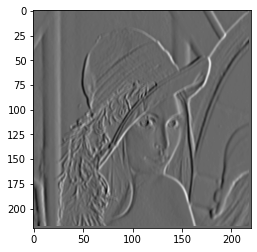

In [56]:
plt.imshow(result, 'gray')
plt.show()

# debug

In [ ]:
tmp_conv = img[0:3, 0:3] * conv_filter1.reshape(3,3,1)
tmp_conv

In [ ]:
np.sum(tmp_conv, axis=0)

In [ ]:
np.sum(np.sum(tmp_conv, axis=0), axis=0)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img

In [ ]:
img[0:2, 0:2]

In [ ]:
img[0:2, 0:2][0]

In [ ]:
img[0:3, 0:3]

In [ ]:
conv_filter1.reshape(3,3,1)

In [ ]:
conv_filter1

In [ ]:
img[0:3, 0:3][0]

In [ ]:
conv_filter2

In [ ]:
tmp_conv = img[0:3, 0:3] * conv_filter1.reshape(3,3,1)
tmp_conv

In [ ]:
np.sum(tmp_conv, axis=0)

In [ ]:
np.sum(np.sum(tmp_conv, axis=0), axis=0)

In [ ]:
tmp_conv

In [ ]:
tmp_conv.shape

In [ ]:
np.sum(tmp_conv[2])

In [ ]:
np.sum(np.sum(tmp_conv, axis=2), axis=1)

In [ ]:
output[0,0] = np.sum(np.sum(tmp_conv, axis=2), axis=1)

In [ ]:
output.shape

In [ ]:
output

In [ ]:
def conv2d(ndarray, conv_filter):
    H, W = ndarray.shape[0], ndarray.shape[1]
    fH, fW = conv_filter.shape[0], conv_filter.shape[1]
    
    output = np.zeros(ndarray.shape)
    
    for i in range(H-fH+1):
        for j in range(W-fW+1):
            tmp_conv = ndarray[i:i+fH, j:j+fW] * conv_filter
            output[i,j] = np.sum(np.sum(tmp_conv, axis=0), axis=0)
#             output[i,j] = np.sum(np.sum(tmp_conv, axis=2), axis=1)
            
    return output

In [ ]:
conv_filter1 = np.array([[-1, -1, -1],
                         [0 ,0 ,0],
                         [1, 1, 1]]).reshape(3,3,1)
conv_filter2 = np.array([[1, 0, -1],
                         [1 ,0 ,-1],
                         [1, 0, -1]]).reshape(3,3,1)

In [ ]:
result = conv2d(img, conv_filter2)
result = (result - np.min(result)) / (np.max(result) - np.min(result))

In [ ]:
plt.imshow(result, 'gray')
plt.show()